In [84]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter, ImageOps

In [85]:
# Light Background Dark Text Example
input_image = "sample_data/y2dm4.png"

# Dark Background Light Text Example
input_image = "sample_data/78sw3.png"

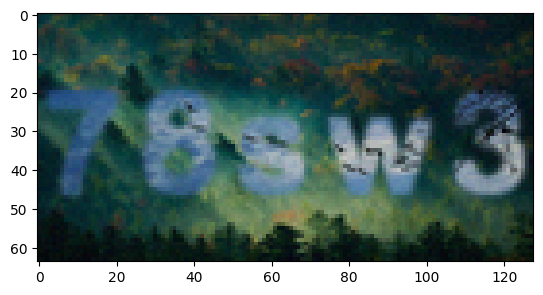

In [86]:
img = Image.open(input_image)
plt.imshow(img)

In [87]:
def convert_to_grayscale(img):
    return img.convert('L')

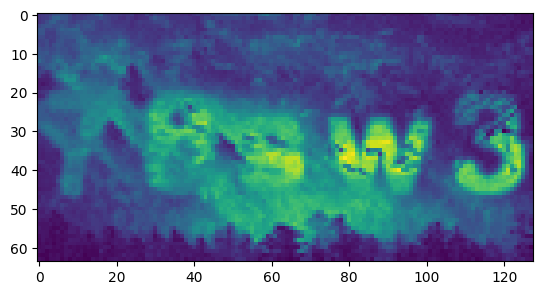

In [88]:
img = convert_to_grayscale(img)
plt.imshow(img)

In [89]:
def blur_image(img):
    return img.filter(ImageFilter.GaussianBlur(radius=2))

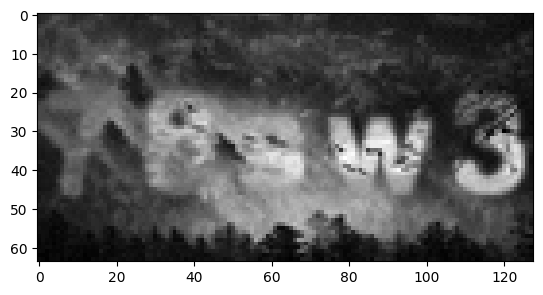

In [90]:
# img = blur_image(img)
plt.imshow(img, cmap='gray')

In [91]:
def binarize(img):
    arr = np.array(img)
    threshold = np.mean(arr)  # Or try 128 for a fixed value
    binary_arr = np.where(arr > threshold, 255, 0).astype(np.uint8)
    return Image.fromarray(binary_arr)

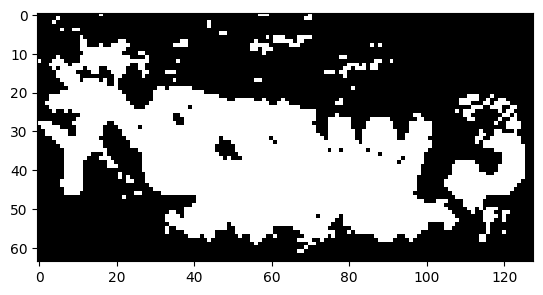

In [92]:
img = binarize(img)
plt.imshow(img, cmap='gray')

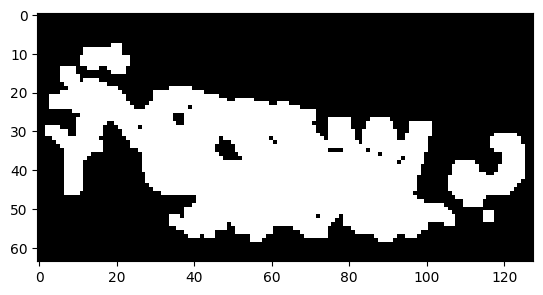

In [93]:
# Manual erosion with NumPy (for a 3x3 kernel)
def erode(arr, kernel_size=3):
    pad = kernel_size // 2
    padded = np.pad(arr, pad, mode='constant', constant_values=255)  # Pad with white to avoid edge issues
    out = np.zeros_like(arr)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            out[i, j] = np.min(padded[i:i+kernel_size, j:j+kernel_size])
    return out

# Manual dilation with NumPy
def dilate(arr, kernel_size=3):
    pad = kernel_size // 2
    padded = np.pad(arr, pad, mode='constant', constant_values=0)  # Pad with black
    out = np.zeros_like(arr)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            out[i, j] = np.max(padded[i:i+kernel_size, j:j+kernel_size])
    return out

# Apply erosion then dilation (opening operation to clean noise)
eroded = erode(np.array(img))
opened = dilate(eroded)

# Convert back to Pillow Image
preprocessed_img = Image.fromarray(opened)
plt.imshow(preprocessed_img, cmap='gray')